# Exercise 4a 
## Fundamentals of Machine Learning, WiSe 20/21
#### Authors: Catherine Knobloch, Elias Olofsson, Julia Siegl
#### Version information:
        2021-01-10: v.1.0. First public release. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#pd.options.display.float_format = '{:,.2f}'.format
from sklearn import model_selection
import time

## 2. Red Cards Study
### 2.1 Loading and Cleaning the Data (10 pts)

In [2]:
# Import the original data
filename=os.path.join('data','CrowdstormingDataJuly1st.csv')
df = pd.read_csv(filename)

In [3]:
df.shape

(146028, 28)

We see that the shape of the data is 146028 player-referee dyads, each with 28 features. Inspecting the structure of the dataframe:

In [4]:
df.iloc[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [5]:
df.iloc[:10,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Each row describes the history between any specific player with a specific referee. How many games said player have played with this referee, no. of victories, no. of defeats, no. of cards received etc. 

First, we may drop features we deem is irrelevant for the research question. I reason that the features **playerShort**, **player**, **club**, **defeats** may be removed from the dataset without losing precision for the model. The first three because they should realistically not have any significant impact in an average sense, and last one because it's redundant information since victories, defeats and game counts are already included. 

Furthermore **photoID** is only for reference for the dataanalyst, so it can go. Next, I belive that the feature **Alpha_3** is the non-obfuscated **refCountry** equivialent, and such we can keep this one get rid of **refCountry**. I'm not sure why this feature exists here in this dataframe, since it is not covered in the documentation from the study. 

The feature **birthday** could be used to calculate the age of a player, but since I'm inclined to believe that this does not have a factor, we drop this as well.

Since I'm short on time, and do not fully understand the IAT and EXP ratings for the referee countries, I drop the sample sizes (**nIAT**, **nExp**) and variances (**seIAT**, **seExp**) of these, and naively keep the two means. Since this is the only way I will (naively & ignorantly) consider the country of the referee, I can drop the country label **Alpha_3** as well.

As Team 23 (Tom Stafford, Mat Evans, Colin Bannard & Tim Heaton) [[Available Online]](https://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb) reasons in the their data visualization, the occurance of red cards is overall very rare, happening only in some ~99.2% of the games, so we stop considering indiviual referees and thus drop the referee label **refNum**. We do not however explore the removal of any individual referees as Team Stafford did in their study, and instead accept the data impurity this brings.

In [6]:
df_full = df.copy() # Retain full copy of dataframe.

# Dropping the selected features
features_drop = ['playerShort', 'player', 'club', 'defeats', 'photoID', 'refCountry',
                 'birthday','nIAT', 'nExp', 'seIAT', 'seExp', 'Alpha_3', 'refNum']
for feature in features_drop:
    df = df.drop([feature], axis=1) 

# Calculating rater mean 
raters = ['rater1', 'rater2']
df['raterMean'] = df[raters].mean(axis=1)
df = df.drop(raters, axis=1)

Then, we can convert catergorical features into one-hot encoding, by taking help from: https://stackoverflow.com/a/52935270

In [7]:
def onehot_encode_and_bind(dataframe, feature_to_encode):
    dummies = pd.get_dummies(dataframe[[feature_to_encode]])
    res = pd.concat([dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [8]:
features_encode = ['leagueCountry', 'position']
for feat in features_encode:
    df = onehot_encode_and_bind(df, feat)

Then, we need to take care of the missing data in the vector of the skin color rating, which stems from the fact that there was not available pictures of all football players in the dataset. Since I have not learned any proper statisically correct way to deal with missing values, I simply drop the dyads where no image is present, and as such I most typically will have a bias in the dataset.

In [9]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(146028, 28)
(123715, 28)


Thus we have removed ~15% of the dyas of players which did not have a picture associated.

Then, we create a new variable, which later is to be used as the response of the linear system. We let this variable be the number of red cards per game, for each player-referee dyad.

In [10]:
df['redsPerGame'] = df.redCards/df.games
df = df.drop(['redCards', 'games'], axis=1)

Since we will be using a Ordinary Least Squares method of linear regression, we have to first center the data in order to comply with the algorithm where the linear intercept will always be $b = 0$. 

In [11]:
# Centering the data
df_mean = df.mean()
df = df - df.mean()

Then, we the data should be ready enough for the next part of the analysis.

### 2.2 Model Creation (8 pts)

Implementing linear regression through Ordinary Least Squares (OLS). Since we centered the data in the previous step, the intercept $\hat{b}$ in the linear model
\begin{equation}
    \hat{Y}_{i}=X_{i} \hat{\beta}+\hat{b},
\end{equation}
will then always be zero.

In [12]:
# Creating the feature matrix X and response vector Y from the pandas dataframe.
Y = df.redsPerGame.to_numpy()
X = df.drop(['redsPerGame'], axis=1).to_numpy()

# Solving the normal equations of OLS.
beta = np.linalg.solve(X.T @ X, X.T @ Y)

In [13]:
# K-fold cross-validation.
N_folds = 10
RMSE = np.zeros(N_folds)
kf = model_selection.KFold(n_splits=N_folds, shuffle=True)
i = 0
for train, test in kf.split(X):
    # Split up into training and test folds.
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    # Train model and get predictions on test data.
    beta = np.linalg.solve(X_train.T @ X_train, X_train.T @ Y_train)
    Y_predictions = X_test @ beta 

    # Get the root mean squared error.
    diff = Y_predictions - Y_test
    RMSE[i] = np.sqrt(np.mean(diff**2))
    i += 1

avg_error = np.mean(RMSE)
std_error = np.std(RMSE)
print('Linear Regression, Ordinary Least Squares method:')
print(f'Root Mean Squared Error, average over {N_folds}-fold cross-valdiation: {avg_error:.3} ± {std_error:.1}')

Linear Regression, Ordinary Least Squares method:
Root Mean Squared Error, average over 10-fold cross-valdiation: 0.052 ± 0.004


### Regression forest.
Using our own old code from Exercise 4, but also code from the corresponding sample solution.

In [14]:
# base classes
class Node:
    pass

class Tree:
    def __init__(self):
        self.root = Node()
    
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"):
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

In [15]:
class RegressionTree(Tree):
    def __init__(self):
        super(RegressionTree, self).__init__()
        
    def train(self, data, labels, n_min=20):
        '''
        data: the feature matrix for all digits
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D)) # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels
        
        #put root in stack
        stack = [self.root]
        while len(stack):
            node = stack.pop()
            n = node.data.shape[0] # number of instances in present node
            unique_rows = np.unique(node.data, axis=0)
            
            if n >= n_min and len(unique_rows) > 1:
                # Call 'make_regression_split_node()' with 'D_try' randomly selected 
                # feature indices. This turns 'node' into a split node
                # and returns the two children, which must be placed on the 'stack'.
                while True:
                    perm = np.random.permutation(D)   # permute D indices
                    select_idx = perm[:D_try]         # select sqrt(D) of these indices.
                    
                    # Ensure indices are valid, i.e. does not render the data *identical* for the
                    # chosen indices.
                    unique_rows = np.unique(node.data[:,select_idx], axis=0)
                    if len(unique_rows) > 1:
                        break
                
                #select :D_try of permuted indices for 'make_regression_split_node()'
                left, right = make_regression_split_node(node, select_idx) 
                                                       
                # put children in stack
                stack.append(left)
                stack.append(right)
            else:
                # Call 'make_regression_leaf_node()' to turn 'node' into a leaf node.
                make_regression_leaf_node(node)
                
    def predict(self, x):
        leaf = self.find_leaf(x)
        # compute p(y | x)
        return leaf.response 

In [16]:
def make_regression_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    n, D = node.data.shape

    # find best feature j (among 'feature_indices') and best threshold t for the split
    e_min = 1e100
    j_min, t_min = 0, 0
    for j in feature_indices:
        # remove duplicate features
        dj = np.sort(np.unique(node.data[:,j]))
        # compute candidate thresholds in the middle between consecutive feature values
        tj = 0.5 * (dj[1:] + dj[:-1]) 
        # each candidate threshold we need to compute squared errors of the resulting children nodes
        for t in tj:
            # masks for left and right indices
            left_indices  = node.data[:,j] <= t
            right_indices = node.data[:,j] > t
            
            # left and right labels
            ll = node.labels[left_indices]
            rl = node.labels[right_indices]
            
            # left and right squared errors
            el = np.sum((ll - np.mean(ll))**2)
            er = np.sum((rl - np.mean(rl))**2)
            
            # choose the the best threshold that minimizes sum of squared errors
            if el + er < e_min:
                e_min = el + er
                j_min = j
                t_min = t

    # create children
    left = Node()
    right = Node()
    
    # initialize 'left' and 'right' with the data subsets and labels
    # according to the optimal split found above
    left.data = node.data[node.data[:,j_min] <= t_min, :]
    left.labels = node.labels[node.data[:,j_min] <= t_min]
    right.data = node.data[node.data[:,j_min] > t_min, :]
    right.labels = node.labels[node.data[:,j_min] > t_min]

    # turn the current 'node' into a split node
    # (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    # return the children (to be placed on the stack)
    return left, right

In [17]:
def make_regression_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    node.response = np.mean(node.labels)

In [18]:
class RegressionForest():
    def __init__(self, n_trees):
        # create ensemble
        self.trees = [RegressionTree() for i in range(n_trees)]
    
    def train(self, data, labels, n_min=0):
        for tree in self.trees:
            # train each tree, using a bootstrap sample of the data
            bootstrap = np.random.choice(len(data), size=len(data))
            tree.train(data[bootstrap], labels[bootstrap], n_min)

    def predict(self, x):
        # compute the ensemble prediction
        return np.mean([tree.predict(x) for tree in self.trees], axis=0)

In [19]:
# Initialize the forest.
n_trees = 2
RF = RegressionForest(n_trees)

tik = time.time()

# K-fold cross-validation. (WARNING: This quickly becomes very slow to run for large forests.) 
N_folds = 3
RMSE = np.zeros(N_folds)
kf = model_selection.KFold(n_splits=N_folds, shuffle=True)
i = 0
for train, test in kf.split(X):
    # Split up into training and test folds.
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    # Preallocation
    Y_pred = np.zeros_like(Y_test)
    
    # Train forest and get predictions on test data.
    RF.train(X_train, Y_train, n_min=1000)
    for j in range(Y_test.shape[0]):
        Y_pred[j] = RF.predict(X_test[j])

    # Get the root mean squared error.
    diff = Y_pred - Y_test
    RMSE[i] = np.sqrt(np.mean(diff**2))
    i += 1

avg_error = np.mean(RMSE)
std_error = np.std(RMSE)
print(f'Regression forest, consisting of {n_trees} trees:')
print(f'Root Mean Squared Error, average over {N_folds}-fold cross-valdiation: {avg_error:.3} ± {std_error:.1}')

tok = time.time()
print(f'Time elapsed: {tok-tik:.4}s')

Regression forest, consisting of 2 trees:
Root Mean Squared Error, average over 3-fold cross-valdiation: 0.0523 ± 0.003
Time elapsed: 25.92s


### 2.3 Answering the Research Question (6 pts)
Creating 19 new samples with the skin color variable **raterMean** randomly shuffled among the player-referee dyads.

In [20]:
# Create empty list to contain the training sets.
X_list = []

# Append the original feature dataset.
X_list.append(X.copy())

# Create 19 new datasets where the 'raterMean' variable is randomly shuffled in-place. 
idx = df.columns.get_loc('raterMean')
for i in range(19):
    np.random.shuffle(X[:,idx]) # Random shuffle in-place.
    X_list.append(X.copy())     # Append matrix copy to list

In [21]:
print(len(X_list))
print(X_list[0].shape)

20
(123715, 26)


Thus we have a list 20 elements, where the first element is the orginial matrix X, and the remaining elements are copies of X where the column corresponding to variable **raterMean** has been randomly shuffled in-place.

Now we perform linear regression on each of the 20 different matricies X, starting with Ordinary Least Squares. 

In [22]:
# K-fold cross-validation.
N_folds = 10
kf = model_selection.KFold(n_splits=N_folds, shuffle=True)

# List for errors of each dataset.
avg_err = []
std_err = []

for X_i in X_list:
    RMSE = np.zeros(N_folds)
    i = 0
    for train, test in kf.split(X):
        # Split up into training and test folds.
        X_train, X_test, Y_train, Y_test = X_i[train], X_i[test], Y[train], Y[test]

        # Train model and get predictions on test data.
        beta = np.linalg.solve(X_train.T @ X_train, X_train.T @ Y_train)
        Y_predictions = X_test @ beta 

        # Get the root mean squared error.
        diff = Y_predictions - Y_test
        RMSE[i] = np.sqrt(np.mean(diff**2))
        i += 1

    # Append the average and std of the RMSE for the different folds. 
    avg_err.append(np.mean(RMSE))
    std_err.append(np.std(RMSE))

In [23]:
print('Linear Regression, Ordinary Least Squares method.')
print(f'Root Mean Squared Error, average over {N_folds}-fold cross-valdiation.\n')
for i in range(len(X_list)):
    if i == 0:
        print('---------------------------')
        print('Non-permutated skin-rating:\n')
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}\n')
    elif i == 1:
        print('---------------------------')
        print('Permutated skin-rating:\n')
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}')
    else:
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}')

Linear Regression, Ordinary Least Squares method.
Root Mean Squared Error, average over 10-fold cross-valdiation.

---------------------------
Non-permutated skin-rating:

    i =  0, Avg. RMSE:      0.05198 ± 0.004493

---------------------------
Permutated skin-rating:

    i =  1, Avg. RMSE:      0.05203 ± 0.003852
    i =  2, Avg. RMSE:      0.05206 ± 0.003434
    i =  3, Avg. RMSE:      0.05208 ± 0.003094
    i =  4, Avg. RMSE:      0.0521  ± 0.002821
    i =  5, Avg. RMSE:      0.05199 ± 0.004389
    i =  6, Avg. RMSE:      0.05209 ± 0.003005
    i =  7, Avg. RMSE:      0.05205 ± 0.003596
    i =  8, Avg. RMSE:      0.05208 ± 0.003232
    i =  9, Avg. RMSE:      0.05211 ± 0.002667
    i = 10, Avg. RMSE:      0.05211 ± 0.002641
    i = 11, Avg. RMSE:      0.05206 ± 0.00341
    i = 12, Avg. RMSE:      0.05203 ± 0.003849
    i = 13, Avg. RMSE:      0.05207 ± 0.003286
    i = 14, Avg. RMSE:      0.05204 ± 0.003744
    i = 15, Avg. RMSE:      0.0521  ± 0.002738
    i = 16, Avg. RMSE: 

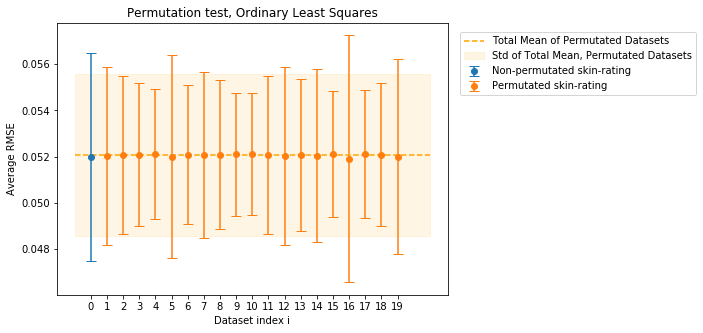

In [24]:
# Total avg error & std for the permutated datasets.
tot_avg_err = np.mean(avg_err[1:])
tot_std_err = np.sqrt(np.mean(np.array(std_err[1:])**2))

# Plotting
# -------------------------
plt.figure(figsize=(7,5))

# Individual datasets
plt.errorbar(0, avg_err[0], yerr=std_err[0], fmt='o', capsize=5, label='Non-permutated skin-rating')
plt.errorbar(np.arange(1,20), avg_err[1:], yerr=std_err[1:], fmt='o', capsize=5, label='Permutated skin-rating')

# Total errors of permutated datasets.
x = np.linspace(-1,21)
y = np.ones_like(x)*tot_avg_err
plt.plot(x, y, '--', color='orange', label='Total Mean of Permutated Datasets')
plt.fill_between(x, (y-tot_std_err), (y+tot_std_err), color='orange', alpha=.1, label='Std of Total Mean, Permutated Datasets')

plt.title('Permutation test, Ordinary Least Squares')
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.85))
plt.xticks(np.arange(20), np.arange(20))
plt.xlabel('Dataset index i')
plt.ylabel('Average RMSE')
plt.show()

As can be seen in the figure, the mean error of the permutated datasets are slightly higher than the non-permutated. However, taking the errors into account the difference is vanishingly small. Thus no strong conclusions should be drawn from this without further study. 

#### Permutation test using Regression Forest

In [25]:
# Initialize the forest.
n_trees = 2
RF = RegressionForest(n_trees)

# List for errors of each dataset.
avg_err = []
std_err = []

tik = time.time()

for X_i in X_list:
    # K-fold cross-validation. (WARNING: This quickly becomes very slow to run for large forests.) 
    N_folds = 3
    RMSE = np.zeros(N_folds)
    kf = model_selection.KFold(n_splits=N_folds, shuffle=True)
    i = 0
    for train, test in kf.split(X):
        # Split up into training and test folds.
        X_train, X_test, Y_train, Y_test = X_i[train], X_i[test], Y[train], Y[test]

        # Preallocation
        Y_pred = np.zeros_like(Y_test)

        # Train forest and get predictions on test data.
        RF.train(X_train, Y_train, n_min=1000)
        for j in range(Y_test.shape[0]):
            Y_pred[j] = RF.predict(X_test[j])

        # Get the root mean squared error.
        diff = Y_pred - Y_test
        RMSE[i] = np.sqrt(np.mean(diff**2))
        i += 1

    # Append the average and std of the RMSE for the different folds. 
    avg_err.append(np.mean(RMSE))
    std_err.append(np.std(RMSE))
    
tok = time.time()
print(f'Time elapsed: {tok-tik:.4}s')

Time elapsed: 505.1s


In [26]:
print(f'Regression forest, consisting of {n_trees} trees.')
print(f'Root Mean Squared Error, average over {N_folds}-fold cross-valdiation.\n')
for i in range(len(X_list)):
    if i == 0:
        print('---------------------------')
        print('Non-permutated skin-rating:\n')
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}\n')
    elif i == 1:
        print('---------------------------')
        print('Permutated skin-rating:\n')
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}')
    else:
        print(f'    i = {i:2}, Avg. RMSE:      {avg_err[i]:<7.4} ± {std_err[i]:.4}')

Regression forest, consisting of 2 trees.
Root Mean Squared Error, average over 3-fold cross-valdiation.

---------------------------
Non-permutated skin-rating:

    i =  0, Avg. RMSE:      0.05232 ± 0.002015

---------------------------
Permutated skin-rating:

    i =  1, Avg. RMSE:      0.05234 ± 0.001262
    i =  2, Avg. RMSE:      0.05225 ± 0.002679
    i =  3, Avg. RMSE:      0.05234 ± 0.0006005
    i =  4, Avg. RMSE:      0.05233 ± 0.00189
    i =  5, Avg. RMSE:      0.0523  ± 0.001498
    i =  6, Avg. RMSE:      0.0523  ± 0.0024
    i =  7, Avg. RMSE:      0.05235 ± 0.0004066
    i =  8, Avg. RMSE:      0.05232 ± 0.00123
    i =  9, Avg. RMSE:      0.05229 ± 0.002533
    i = 10, Avg. RMSE:      0.05234 ± 0.001954
    i = 11, Avg. RMSE:      0.05232 ± 0.002715
    i = 12, Avg. RMSE:      0.05232 ± 0.0009469
    i = 13, Avg. RMSE:      0.05235 ± 0.0007858
    i = 14, Avg. RMSE:      0.05234 ± 0.001422
    i = 15, Avg. RMSE:      0.05233 ± 0.002252
    i = 16, Avg. RMSE:      0.0

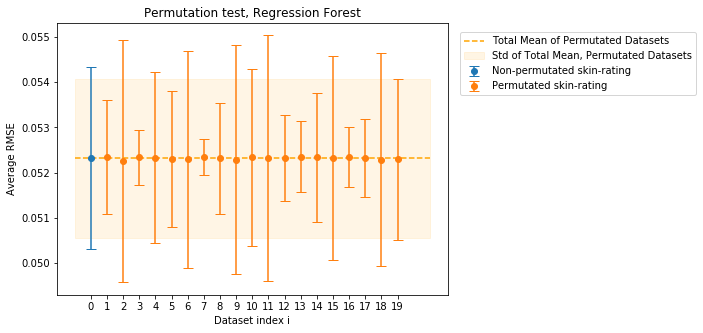

In [27]:
# Total avg error & std for the permutated datasets.
tot_avg_err = np.mean(avg_err[1:])
tot_std_err = np.sqrt(np.mean(np.array(std_err[1:])**2))

# Plotting
# -------------------------
plt.figure(figsize=(7,5))

# Individual datasets
plt.errorbar(0, avg_err[0], yerr=std_err[0], fmt='o', capsize=5, label='Non-permutated skin-rating')
plt.errorbar(np.arange(1,20), avg_err[1:], yerr=std_err[1:], fmt='o', capsize=5, label='Permutated skin-rating')

# Total errors of permutated datasets.
x = np.linspace(-1,21)
y = np.ones_like(x)*tot_avg_err
plt.plot(x, y, '--', color='orange', label='Total Mean of Permutated Datasets')
plt.fill_between(x, (y-tot_std_err), (y+tot_std_err), color='orange', alpha=.1, label='Std of Total Mean, Permutated Datasets')

plt.title('Permutation test, Regression Forest')
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.85))
plt.xticks(np.arange(20), np.arange(20))
plt.xlabel('Dataset index i')
plt.ylabel('Average RMSE')
plt.show()

This plot is even less helpful than the previous one, with the total mean of the permutated datasets being even closer to the mean of the non-permutated dataset than for the previous OLS analysis. Furthermore, the errors are also fluctuating more than before, which adds to the inconclusiveness of the results. Perhaps if larger forests and a higher K-fold crossvalidation could be used, then better performance could be obtained. However, this would require dramatically more computation time.